In [134]:
import pandas as pd
import numpy as np
from matplotlib.image import thumbnail


In [135]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the images folder
image_folder_path = "images"

# Function to fetch and display an image
def fetch_and_display_image(image_name):
    image_path = os.path.join(image_folder_path, image_name)
    if os.path.exists(image_path):
        # Load the image
        image = Image.open(image_path)
        # Display the image
        plt.imshow(image)
        plt.axis('off')  # Turn off the axis
        plt.show()
    else:
        print(f"Image {image_name} not found in the folder.")



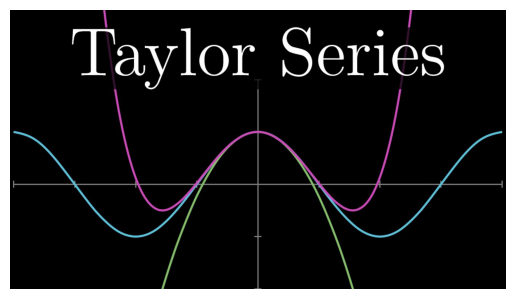

In [136]:

ID = "3d6DsjIBzJ4.jpg"
image_path1 = f"/Users/ricky/Downloads/DATA BOOSTCAMP/Booscamp DATA/Machine Learning/Project porfolio/Project 11 - NLP - Recommend Youtube title with TFBert HuggingFace/Medium dataset ( image vs csv )/images/3Blue1Brown/{ID}"  # Replace with the actual image name
fetch_and_display_image(image_path1)

In [137]:
df = pd.read_csv("metadata.csv")
print(df.shape)
df.head()

(2515, 4)


,Id,Channel,Category,Title
0,OkmNXy7er84,3Blue1Brown,Science,The hardest problem on the hardest test
1,r6sGWTCMz2k,3Blue1Brown,Science,But what is a Fourier series? From heat flow t...
2,bBC-nXj3Ng4,3Blue1Brown,Science,But how does bitcoin actually work?
3,aircAruvnKk,3Blue1Brown,Science,"But what is a neural network? | Chapter 1, Dee..."
4,HEfHFsfGXjs,3Blue1Brown,Science,The most unexpected answer to a counting puzzle


In [138]:
df['image_name'] = df['Id'].apply(lambda x : str(x) + ".jpg")
df.head()

,Id,Channel,Category,Title,image_name
0,OkmNXy7er84,3Blue1Brown,Science,The hardest problem on the hardest test,OkmNXy7er84.jpg
1,r6sGWTCMz2k,3Blue1Brown,Science,But what is a Fourier series? From heat flow t...,r6sGWTCMz2k.jpg
2,bBC-nXj3Ng4,3Blue1Brown,Science,But how does bitcoin actually work?,bBC-nXj3Ng4.jpg
3,aircAruvnKk,3Blue1Brown,Science,"But what is a neural network? | Chapter 1, Dee...",aircAruvnKk.jpg
4,HEfHFsfGXjs,3Blue1Brown,Science,The most unexpected answer to a counting puzzle,HEfHFsfGXjs.jpg


In [139]:
df['image_name'].iloc[5]

'spUNpyF58BY.jpg'

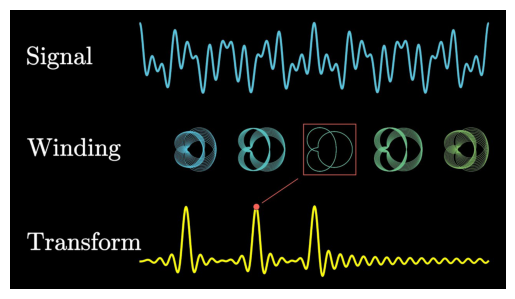

In [140]:
ID = df['image_name'].iloc[5]
path = image_path + f"/{ID}"
fetch_and_display_image(path)

In [141]:
df.isnull().sum()

Id            0
Channel       0
Category      0
Title         0
image_name    0
dtype: int64

In [142]:
df.duplicated(subset=['Title']).sum()

2

In [143]:
df.drop_duplicates(inplace=True)

In [144]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    word = [word for word in words if word not in stop_words and string.punctuation and word.isalnum()]
    return " ".join(word)

[nltk_data] Downloading package stopwords to /Users/ricky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ricky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [145]:
df['cleaned_text'] = df['Title'].apply(clean_text)
df.head()

,Id,Channel,Category,Title,image_name,cleaned_text
0,OkmNXy7er84,3Blue1Brown,Science,The hardest problem on the hardest test,OkmNXy7er84.jpg,hardest problem hardest test
1,r6sGWTCMz2k,3Blue1Brown,Science,But what is a Fourier series? From heat flow t...,r6sGWTCMz2k.jpg,fourier series heat flow drawing circles de4
2,bBC-nXj3Ng4,3Blue1Brown,Science,But how does bitcoin actually work?,bBC-nXj3Ng4.jpg,bitcoin actually work
3,aircAruvnKk,3Blue1Brown,Science,"But what is a neural network? | Chapter 1, Dee...",aircAruvnKk.jpg,neural network chapter 1 deep learning
4,HEfHFsfGXjs,3Blue1Brown,Science,The most unexpected answer to a counting puzzle,HEfHFsfGXjs.jpg,unexpected answer counting puzzle


In [146]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
def get_text_embedding(text):
    input_ids = tokenizer.encode(text, return_tensors='pt', padding=True, truncation=True, max_length=216)
    with torch.no_grad():
         outputs = model(input_ids)
    cls_embeddings = outputs.last_hidden_state[:, 0, :]
    return cls_embeddings.cpu().numpy()

In [147]:
df['text_embedding'] = df['cleaned_text'].apply(get_text_embedding)
df.head()

,Id,Channel,Category,Title,image_name,cleaned_text,text_embedding
0,OkmNXy7er84,3Blue1Brown,Science,The hardest problem on the hardest test,OkmNXy7er84.jpg,hardest problem hardest test,"[[-0.4457324, -0.015303003, -0.2134256, 0.0530..."
1,r6sGWTCMz2k,3Blue1Brown,Science,But what is a Fourier series? From heat flow t...,r6sGWTCMz2k.jpg,fourier series heat flow drawing circles de4,"[[-0.8217722, -0.069297686, 0.34848225, 0.0076..."
2,bBC-nXj3Ng4,3Blue1Brown,Science,But how does bitcoin actually work?,bBC-nXj3Ng4.jpg,bitcoin actually work,"[[0.041277245, 0.04667019, 0.078238845, 0.3289..."
3,aircAruvnKk,3Blue1Brown,Science,"But what is a neural network? | Chapter 1, Dee...",aircAruvnKk.jpg,neural network chapter 1 deep learning,"[[0.06383929, -0.016349973, 0.14123838, 0.0898..."
4,HEfHFsfGXjs,3Blue1Brown,Science,The most unexpected answer to a counting puzzle,HEfHFsfGXjs.jpg,unexpected answer counting puzzle,"[[-0.19287966, 0.18022817, -0.1068432, 0.11960..."


In [148]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine(embedding, embeddings):
    similarities = cosine_similarity(embedding.reshape(1, -1), np.vstack(embeddings)).flatten()
    return similarities

def recommendation(text, df , top_n):
    text_cleaned = clean_text(text)
    embedding = get_text_embedding(text_cleaned)
    embeddings = df['text_embedding'].tolist()
    similarity = compute_cosine(embedding, embeddings)
    df['similarity'] = similarity
    df_sorted = df.sort_values(by='similarity', ascending=False)
    recommendation = df_sorted[df_sorted['Title'] != text].head(top_n)
    return recommendation[['Id','Title','Channel','Category','image_name','similarity']]

In [149]:
text = "Master Chef"
recommendation(text, df, top_n=10)

,Id,Title,Channel,Category,image_name,similarity
763,u21W_tfPVrY,VS Code Top-Ten Pro Tips,Fireship,Tech,u21W_tfPVrY.jpg,0.921618
1717,s4mGOrbEKbs,A New Slapping Champion Has Arrived,penguinz0,"Blog,Comedy",s4mGOrbEKbs.jpg,0.913498
1492,ha4tRQwKIUg,I Bought Everything In A Store - Challenge,MrBeast,"Blog,Entertainment",ha4tRQwKIUg.jpg,0.913201
2294,803JDTJJ8iQ,"Classic Offensive, A Mutant Counter-Strike",TheWarOwl,VideoGames,803JDTJJ8iQ.jpg,0.913012
2169,bqAhJcSQQG4,The Best Of Stanley - The Office US,The Office,"Comedy,Entertainment",bqAhJcSQQG4.jpg,0.912398
300,_dSp_f0f9gE,The Magic of Will Tsai | Quick D,Captain Disillusion,Informative,_dSp_f0f9gE.jpg,0.910920
1236,xetnJ_gNRBQ,Top 10 Facts - Humans,LEMMiNO,Informative,xetnJ_gNRBQ.jpg,0.909993
2109,ei43IyseG9Y,Sergeant Jeremy Clarkson Reporting for Duty 💪 ...,The Grand Tour,"Automobile,Comedy",ei43IyseG9Y.jpg,0.909844
2431,pMPomCWUraQ,Metal Gear Dies,videogamedunkey,VideoGames,pMPomCWUraQ.jpg,0.909289
1969,fPcd2egOQnI,The TINIEST Xbox 💖,TechLinked,"Tech,News",fPcd2egOQnI.jpg,0.909284


In [150]:
from joblib import dump

dump(df, "artifact/dataframe.joblib")

['artifact/dataframe.joblib']

In [152]:
base_image_folder = "../images/"

In [153]:
# image_path = f"{base_image_folder}/{Channel}/{image_name}"

Displaying recommended video: VS Code Top-Ten Pro Tips


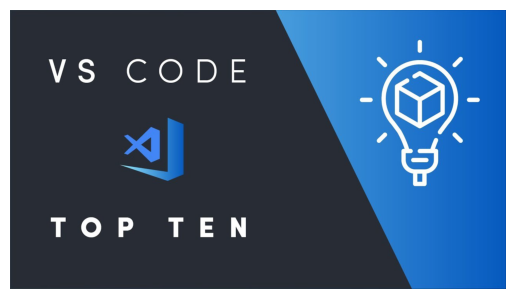

Displaying recommended video: A New Slapping Champion Has Arrived


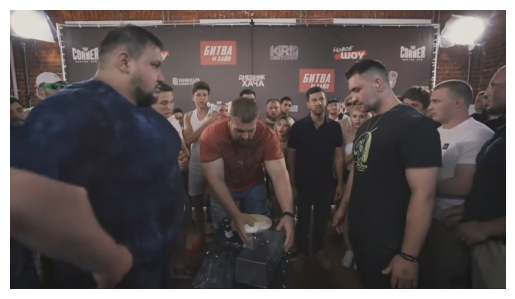

Displaying recommended video: I Bought Everything In A Store - Challenge


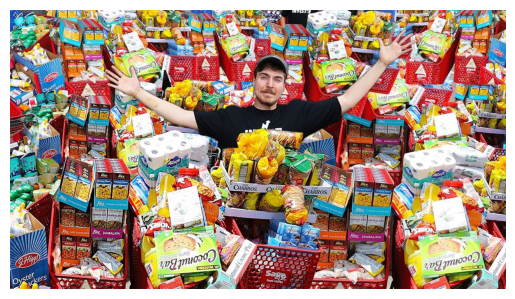

Displaying recommended video: Classic Offensive, A Mutant Counter-Strike


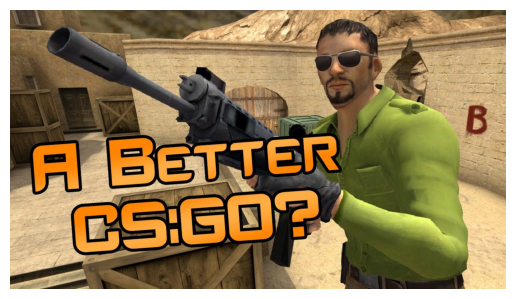

Displaying recommended video: The Best Of Stanley - The Office US


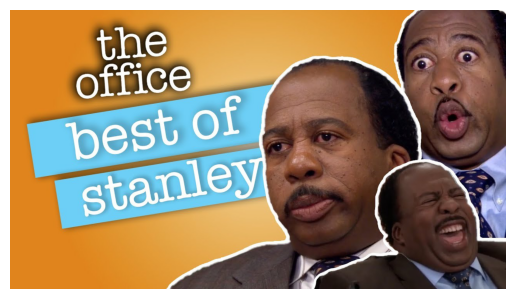

Displaying recommended video: The Magic of Will Tsai | Quick D


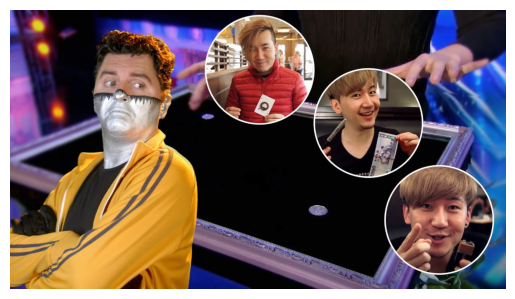

Displaying recommended video: Top 10 Facts - Humans


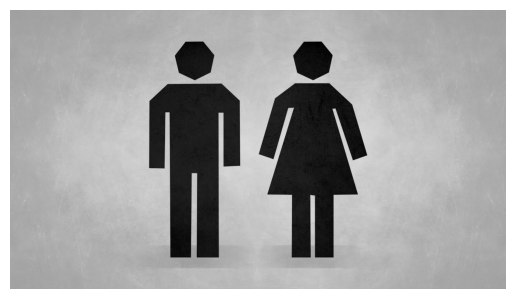

Displaying recommended video: Sergeant Jeremy Clarkson Reporting for Duty 💪 #Shorts


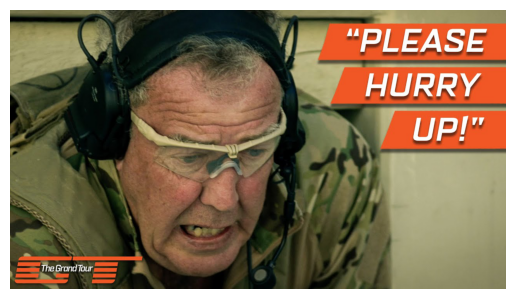

Displaying recommended video: Metal Gear Dies


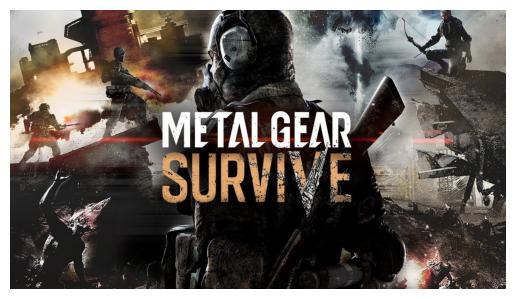

Displaying recommended video: The TINIEST Xbox 💖


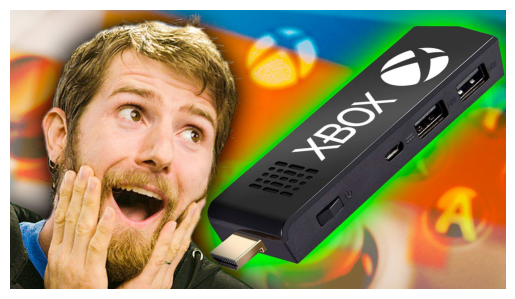

In [154]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML


# Updated image fetching function
def fetch_and_display_image_from_df(recommendation_row, base_image_folder):
    # Extract required information from the row
    channel = recommendation_row['Channel']
    image_name = recommendation_row['image_name']

    # Construct full path for the image
    image_path = os.path.join(base_image_folder, channel, image_name)

    if os.path.exists(image_path):
        # Load and display the image
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')  # Turn off axis
        plt.show()
        return image_path
    else:
        print(f"Image not found: {image_path}")
        return None


def display_recommendations(recommendations, base_image_folder):


    # Limit to 10 recommendations (5 per row, 2 rows max)
    recommendations = recommendations.head(10)
    html = '<div style="display: flex; flex-wrap: wrap; flex-direction: column; justify-content: center; align-items: center;">'

    # Organize recommendations into chunks of 5 (to make rows)
    for i in range(0, len(recommendations), 5):
        row_recommendations = recommendations.iloc[i:i + 5]
        row_html = '<div style="display: flex; justify-content: space-around; width: 100%; margin-bottom: 15px;">'

        for _, row in row_recommendations.iterrows():
            # Extract information for each recommendation
            title = row['Title']
            similarity = row['similarity']
            image_name = row['image_name']
            channel = row['Channel']

            # Construct image path
            image_path = os.path.join(base_image_folder, channel, image_name)
            if os.path.exists(image_path):
                thumbnail_path = image_path
            else:
                thumbnail_path = "path_to_placeholder_image.jpg"  # You can use a placeholder if image is missing

            # Generate HTML for a single video
            row_html += f'''
            <div style="width: 18%; margin: 5px; text-align: center; border: 1px solid #ddd; padding: 10px; border-radius: 10px;">
                <img src="{thumbnail_path}" alt="{title}" style="width: 100%; height: 150px; object-fit: cover; border-radius: 5px;">
                <h4 style="font-size: 14px; margin: 5px 0;">{title}</h4>
                <p style="font-size: 12px; color: #666;">Channel: {channel}</p>
                <p style="font-size: 12px; color: #555;">Similarity: {similarity:.2f}</p>
            </div>
            '''

        # Close the row HTML
        row_html += '</div>'
        html += row_html

    # Close the outer HTML
    html += '</div>'
    display(HTML(html))

# Example usage of the updated functions
text_query = "Master Chef"
base_image_folder = "../images/"  # Define the base folder where images are stored

# Get recommendations
recommendations = recommendation(text_query, df, top_n=10)

# Display images and recommendations
for idx, rec in recommendations.iterrows():
    print(f"Displaying recommended video: {rec['Title']}")
    fetch_and_display_image_from_df(rec, base_image_folder)